In [1]:
!ls news

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
from requests import get
from bs4 import BeautifulSoup

In [7]:
headers = {
    'user-agent':'user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
}

In [16]:
URLs = ['https://news.naver.com/']
visited = list()

while URLs:
    seed = URLs.pop(0) # Queue
    visited.append(seed)
 
    resp = get(seed, headers=headers)
 
    # 오류 처리(위 코드 참조)
    if resp.status_code != 200:
        continue
    
    if re.search('html', resp.headers['content-type']):
        dom = BeautifulSoup(resp.text, 'html.parser')
        # 영역 제한 - 1 (뉴스 카테고리)
        for a in dom.select('[role=menu] a')[1:7]:
            nurl = urljoin(seed, a.attrs['href'])
            if nurl not in URLs and\
                nurl not in visited:
                URLs.append(nurl)
        # 영역 제한 - 2 (특정 뉴스 카테고리 - 뉴스 목록)
        for a in dom.select('a.cluster_text_headline'):
            nurl = urljoin(seed, a.attrs['href'])
            if nurl not in URLs and\
                nurl not in visited:
                URLs.append(nurl)
        # 영역 제한 - 3 (특정 뉴스 한 개)
        if dom.select_one('#contents'):
            # 파일로 저장 - 뉴스
            filename = resp.url.split('/')[-1]
            filename = re.sub('[?#!= ]', '', filename)
            with open('./news/'+filename+'.txt',
                      'w', encoding='utf8') as fp:
                fp.write(dom.select_one('#contents').get_text().strip())

            for img in dom.select(
                '#contents img[src], #contents img[data-src]'):
                nurl = urljoin(seed, img.attrs['src'
                        if img.has_attr('src') else 'data-src'])
                if nurl not in URLs and\
                    nurl not in visited:
                    URLs.append(nurl)
        print(len(URLs))


6
49
82
125
152
179
208
211
215
216
219
223
227
229
234
237
244
247
246
245
244
246
250
254
253
253
258
262
262
264
265
269
273
274
275
279
283
287
287
291
291
294
294
294
296
300
304
304
304
304
304
307
309
310
311
312
313
314
316
319
320
324
325
325
329
329
334
335
336
337
337
337
337
338
342
342
346
347
348
351
352
352
354
357
359
360
363
363
362
365
366
375
380
382
382
383
384
385
388
388
387
387
388
391
391
393
394
395
394
395
396
397
396
397
399
400
401
401
401
401
402
404
406
410
411
414
416
418
421
422
424
429
431
430
429
428
427
426
427
428
429
431
433
433
434
438
446
447
447
451
452
453
454
461
462
464
465
470
473
474
476
476
476
477
478
480
480
480
483
484
484
488
488
488
488
489
489
490
491
491
491
496
496
497
498
498
506
507
507
508
509
510
511
514
515
514
516
517
517
518
519
520
521
523
523
524
524
525
525
525
525
526
527
527
527


In [1]:
from os import listdir

def fileids(path):
    fileList = list()
    
    path = path + ('' if path[-1] == '/' else '/')
    
    for f in listdir(path):
        if f.endswith('.txt'):
            fileList.append(path+f)
            
    return fileList

In [18]:
listdir('news')

['0000031253sid102.txt',
 '0000031269sid101.txt',
 '0000034347cid1089893.txt',
 '0000034906cid1089893.txt',
 '0000035489cid1089893.txt',
 '0000036139cid1089893.txt',
 '0000246599sid100.txt',
 '0000246646sid100.txt',
 '0000329234sid101.txt',
 '0000337316sid100.txt',
 '0000337336sid102.txt',
 '0000337373sid103.txt',
 '0000337375sid104.txt',
 '0000402052sid101.txt',
 '0000591038sid102.txt',
 '0000591242sid101.txt',
 '0000731260sid100.txt',
 '0000737544sid105.txt',
 '0000888908sid104.txt',
 '0000888917sid104.txt',
 '0000888955sid105.txt',
 '0000889011sid100.txt',
 '0000889184sid101.txt',
 '0000889200sid101.txt',
 '0000889219sid101.txt',
 '0000889223sid100.txt',
 '0000889267sid105.txt',
 '0001046261sid100.txt',
 '0001046289sid104.txt',
 '0001046313sid104.txt',
 '0001046354sid100.txt',
 '0001046487sid102.txt',
 '0001204663sid102.txt',
 '0001204858sid100.txt',
 '0001262942sid100.txt',
 '0001597411sid104.txt',
 '0001597481sid100.txt',
 '0001732049sid100.txt',
 '0001732114sid100.txt',
 '0001732

In [19]:
with open(fileids('news')[0], 'r', encoding='utf8') as fp:
    d = fp.read()

In [3]:
import re

p1 = re.compile('[a-zA-Z0-9_-]+@(?:[.]?[a-zA-Z0-9_-]+)+')
p2 = re.compile('[{}]'.format(re.escape('''"'=ㆍⓒ'"''')))
p3 = re.compile('[\(\[].+?[\)\]]')
p4 = re.compile('[a-zA-Z]+')
p5 = re.compile('\s+')
# p5.sub(' ', p4.sub(' ', p3.sub(' ', p2.sub(' ', p1.sub(' ', d))))).strip()

In [6]:
from konlpy.tag import Komoran

ma = Komoran()

In [4]:
corpus = list()

for f in fileids('news'):
    with open(f, 'r', encoding='utf8') as fp:
        corpus.append(p5.sub(' ', 
            p4.sub(' ', 
            p3.sub(' ', 
            p2.sub(' ', 
            p1.sub(' ', fp.read()))))).strip())

In [7]:
from nltk.tokenize import sent_tokenize

corpus_ma = list()

for d in corpus:
    corpus_ma.append(
    '\n'.join([' '.join(ma.morphs(s)) for s in sent_tokenize(d)]))

In [8]:
from nltk.text import Text

corpus_text = list(map(lambda c:Text(c.split()), corpus_ma))

In [9]:
from nltk import FreqDist

fd = FreqDist()
for c in corpus_text:
    fd += c.vocab()

In [10]:
import matplotlib.pyplot as plt

N = 100
Zipf = [1/i for i in range(1, N+1)]
Zipf_fd = [i[1]/fd.get(fd.max()) for i in fd.most_common(N)]

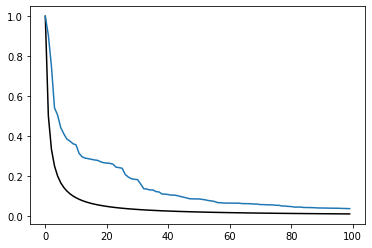

In [11]:
plt.plot(Zipf, 'k-')
plt.plot(Zipf_fd)

# Heaps

In [12]:
heaps = list()

for i in  range(len(corpus_text)):
    heaps.append(FreqDist())
    for j in range(i+1):
        try:
            heaps[-1] += corpus_text[j].vocab()
        except:
            continue

In [13]:
heaps[0].N(), heaps[-1].N(), heaps[-1].B()

(668, 224526, 11274)

In [14]:
heaps[0].B()

296

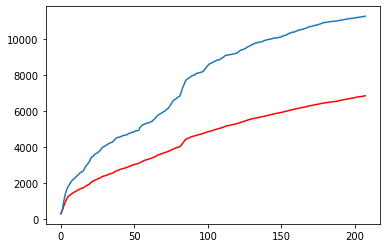

In [15]:

heapslaw = lambda N,k=10,b=.53:k*(N**b)



plt.plot(range(len(heaps)), [heapslaw(c.N()) for c in heaps], 'r-')
plt.plot(range(len(heaps)), [c.B() for c in heaps])

In [67]:
heapslaw(138944), len(heaps), len(fileids('news'))

(6494.931371114975, 208, 208)

In [68]:
def ngram(t, n=2):
    tokens = t.split()
    gram = list()
 
    if len(tokens) < n:
        return tokens
    for i in range(len(tokens)-(n-1)):
        gram.append(' '.join(tokens[i:i+n]))
    return gram

In [69]:
corpus_1gram = list()
corpus_2gram = list()
corpus_3gram = list()

for c in corpus_ma:
    corpus_1gram.extend(ngram(c, 1))
    corpus_2gram.extend(ngram(c, 2))
    corpus_3gram.extend(ngram(c, 3))

In [70]:
from collections import Counter

In [71]:
corpus_1gram = Counter(corpus_1gram)
corpus_2gram = Counter(corpus_2gram)
corpus_3gram = Counter(corpus_3gram)

In [82]:
key = '코로나'
corpus_1gram[key]

1456

In [84]:
[(k, corpus_2gram[k], corpus_2gram[k]/corpus_1gram[key])
for k in corpus_2gram.keys() if k.startswith(key)]

[('코로나 19', 1456, 1.0)]

In [88]:
key = '코로나'
K = 5
generated_sent = key
for _ in range(5):
    candidates = [(k, corpus_2gram[k], corpus_2gram[k]/corpus_1gram[key])
                 for k in corpus_2gram.keys() if k.startswith(key)]
    best_can = sorted(candidates, key=lambda c: c[-1], reverse = True)[:K]
    print(best_can, end='\n\n')
    key = best_can[0][0].split()[-1]
    generated_sent += ' '+key

[('코로나 19', 1456, 1.0)]

[('19 로', 208, 0.14285714285714285), ('19 중앙재난안전대책본부', 208, 0.14285714285714285), ('19 위기', 208, 0.14285714285714285), ('19 엔', 208, 0.14285714285714285), ('19 감염병', 208, 0.14285714285714285)]

[('로 예상', 416, 0.3333333333333333), ('로 확진', 208, 0.16666666666666666), ('로드맵 을', 208, 0.16666666666666666), ('로드맵 에', 208, 0.16666666666666666), ('로 폰', 208, 0.16666666666666666)]

[('예상 되', 208, 0.5), ('예상 하', 208, 0.5)]

[('되 ㄹ', 1248, 0.3157894736842105), ('되 는', 416, 0.10526315789473684), ('되 는데', 416, 0.10526315789473684), ('되 면', 416, 0.10526315789473684), ('되 ㅂ니다', 416, 0.10526315789473684)]



In [89]:
generated_sent

'코로나 19 로 예상 되 ㄹ'

# ngram2
: split 안 하고 list로 하고, append 띄어쓰기 한 것도 붙여서 할거다

In [1]:
def ngram2(t, n=2):
    tokens = list(t)
    gram = list()
 
    if len(tokens) < n:
        return tokens
    for i in range(len(tokens)-(n-1)):
        gram.append(''.join(tokens[i:i+n]))
    return gram

In [91]:
ngram2('주어진 데이터 언어를 이해할 수 있는 확률모델 생성')

['주 어',
 '어 진',
 '진  ',
 '  데',
 '데 이',
 '이 터',
 '터  ',
 '  언',
 '언 어',
 '어 를',
 '를  ',
 '  이',
 '이 해',
 '해 할',
 '할  ',
 '  수',
 '수  ',
 '  있',
 '있 는',
 '는  ',
 '  확',
 '확 률',
 '률 모',
 '모 델',
 '델  ',
 '  생',
 '생 성']

In [ ]:
for i in range(2, len(s)):
    key = s[:1]
    ngram2+1[key]
    
    
    

In [ ]:
boared